In [1]:
"""
Make your notebook easier to read by keeping similar elements
in the same place
"""

#Import dependencies in the same place
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite 

#Import your data in the same place
db_data = pd.read_csv("uniprotlinks.csv")
unip_data = pd.read_csv("uniprot-all2.csv")

In [2]:
#Lots of Operations of Unknown Necessity 
df = db_data.rename(columns={'Name': 'Drug Name', 'UniProt Name': 'Protein Name'})
df_2 = unip_data.rename(columns={'Entry': 'UniProt ID', 'Protein names': 'Protein Name', 'Gene names': 'Gene Symbol'})
Gene_sym = df_2["Gene Symbol"].tolist()


what_i_want = []

for id_ in Gene_sym:
    temp = str(id_).split(' ')
    what_i_want.append(temp)

what_i_actually_want = [id_pair[0] for id_pair in what_i_want]
s = pd.Series(what_i_actually_want)
df_2['Gene Symbol'] = s.values
db_data.join(df_2, on='UniProt ID', lsuffix='left', rsuffix='right')
combined_df = db_data.merge(df_2, how="left")
combined_df2 = combined_df.rename(columns={'Name': 'Drug Name', 'Type': 'Drug Type', 'UniProt Name': 'Protein Names'})
del combined_df2["Protein Name"]
combined_df2['drug_gene'] = list(zip(combined_df2['Drug Name'], combined_df2['Gene Symbol']))

drug_gene_col = combined_df2["drug_gene"]

gene_sym = combined_df2["Gene Symbol"]
gene_sym_isnull = pd.isnull(gene_sym)
gene_sym_nulltrue = gene_sym[gene_sym_isnull]
gene_sym_nullfalse = gene_sym[gene_sym_isnull == False]
combined_df2.dropna(subset=['Gene Symbol'], inplace=True)

edges = combined_df2["drug_gene"].tolist()

In [3]:
B = nx.Graph()

In [4]:
B.add_nodes_from(combined_df2['Drug Name'], bipartite=0)
B.add_nodes_from(combined_df2['Gene Symbol'], bipartite=1)
B.add_edges_from([(row['Drug Name'], row['Gene Symbol']) for idx, row in combined_df2.iterrows()])
bottom_nodes, top_nodes = bipartite.sets(B)


In [5]:
# 102 Cells ----->>>> 5 Cells :) <-- Happy Data Scientist 

#degree_distribution2 
dd2 = B.degree()

dd2

{'Lepirudin': 1,
 'Cetuximab': 12,
 'Denileukin diftitox': 3,
 'Etanercept': 14,
 'Bivalirudin': 1,
 'Leuprolide': 1,
 'Peginterferon alfa-2a': 2,
 'Alteplase': 4,
 'Sermorelin': 1,
 'Interferon alfa-n1': 2,
 'Darbepoetin alfa': 1,
 'Urokinase': 10,
 'Goserelin': 2,
 'Reteplase': 4,
 'Erythropoietin': 1,
 'Salmon Calcitonin': 1,
 'Interferon alfa-n3': 2,
 'Pegfilgrastim': 2,
 'Sargramostim': 5,
 'Secretin': 1,
 'Peginterferon alfa-2b': 2,
 'Thyrotropin Alfa': 1,
 'Antihemophilic Factor (Recombinant)': 11,
 'Anakinra': 1,
 'Immune Globulin Human': 11,
 'Anistreplase': 4,
 'Insulin Human': 12,
 'Tenecteplase': 11,
 'Menotropins': 2,
 'Interferon gamma-1b': 2,
 'Interferon Alfa-2a, Recombinant': 2,
 'Desmopressin': 3,
 'Coagulation factor VIIa Recombinant Human': 6,
 'Oprelvekin': 1,
 'Palifermin': 6,
 'Glucagon recombinant': 3,
 'Aldesleukin': 3,
 'Botulinum Toxin Type B': 3,
 'Omalizumab': 2,
 'Lutropin alfa': 1,
 'OspA lipoprotein': 1,
 'Insulin Lispro': 2,
 'Insulin Glargine': 2,
 'Co

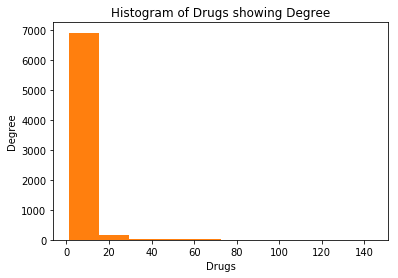

In [28]:
#Tinker with this to get the outcome you want
#See Documentation: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html
#See Example: https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
plt.xlabel('Drugs')
plt.ylabel('Degree')
plt.title('Histogram of Drugs showing Degree')

#labels = [item[0] for item in list(dd2.items())]
degrees = [item[1] for item in list(dd2.items())]

bins = len(x)

#plt.bar(len(degrees), degrees) #normed=1)
plt.hist(degrees, bins)

#plt.axis([0,160,0,120])
plt.show()



In [ ]:
dd2_df = pd.Dataframe(dd2)